1.VOLATALITY ANALYSIS

In [1]:
import os
import glob
import pandas as pd

# Folder where you downloaded the files
folder_path = "D:/stock analysis project final/venv/Scripts/ticker_files"  # change this to your folder

# Pattern for the files to combine
# For CSV: "*.csv"
# For Excel: "*.xlsx"
file_pattern = os.path.join(folder_path, "*.csv")

# List all matching files
file_list = glob.glob(file_pattern)

# Read and collect all DataFrames
df_list = []
for file in file_list:
    df = pd.read_csv(file)  # use pd.read_excel(file) for Excel
    df["source_file"] = os.path.basename(file)  # optional: track origin
    df_list.append(df)

# Concatenate into a single DataFrame
combined_df = pd.concat(df_list, ignore_index=True)

print(combined_df.head())
print("Total rows:", len(combined_df))


     symbol    close              date     high      low    month     open  \
0  ADANIENT  2387.25  03-10-2023 05:30  2424.90  2372.00  2023-10  2418.00   
1  ADANIENT  2464.95  04-10-2023 05:30  2502.75  2392.25  2023-10  2402.20   
2  ADANIENT  2466.35  05-10-2023 05:30  2486.50  2446.40  2023-10  2477.95   
3  ADANIENT  2478.10  06-10-2023 05:30  2514.95  2466.05  2023-10  2466.35   
4  ADANIENT  2442.60  09-10-2023 05:30  2459.70  2411.30  2023-10  2440.00   

    volume   source_file  
0  2019899  ADANIENT.csv  
1  2857377  ADANIENT.csv  
2  1132455  ADANIENT.csv  
3  1510035  ADANIENT.csv  
4  1408224  ADANIENT.csv  
Total rows: 14200


In [2]:
# Basic: save as CSV in the current folder
combined_df.to_csv("combined_stocks1.csv", index=False)


In [3]:
import pandas as pd

# Read your combined CSV file
df = pd.read_csv("combined_stocks1.csv")

# Ensure date is datetime and sorted
df["date"] = pd.to_datetime(
    df["date"],
    format="%m-%y-%d",   # change this to match your data
    errors="coerce"      # invalid dates become NaT
)

df = df.sort_values("date")


In [4]:
# Compute daily returns per stock:
# (Close - Previous Close) / Previous Close
df["Prev_Close"] = df.groupby("symbol")["close"].shift(1)
df["Daily_Return"] = (df["close"] - df["Prev_Close"]) / df["Prev_Close"]

# Drop the first row of each ticker where Prev_Close is NaN
df = df.dropna(subset=["Daily_Return"])

# Compute volatility (standard deviation of daily returns) for each stock
vol_df = df.groupby("symbol")["Daily_Return"].std().reset_index()
vol_df = vol_df.rename(columns={"Daily_Return": "Volatility"})

# Sort to get top 10 most volatile
top10_vol = vol_df.sort_values("Volatility", ascending=False).head(10)
print(top10_vol)


        symbol  Volatility
0     ADANIENT    0.028601
1   ADANIPORTS    0.026029
8          BEL    0.023283
47       TRENT    0.023074
34        ONGC    0.022247
10        BPCL    0.022069
39  SHRIRAMFIN    0.021687
13   COALINDIA    0.021411
21    HINDALCO    0.019587
33        NTPC    0.019475


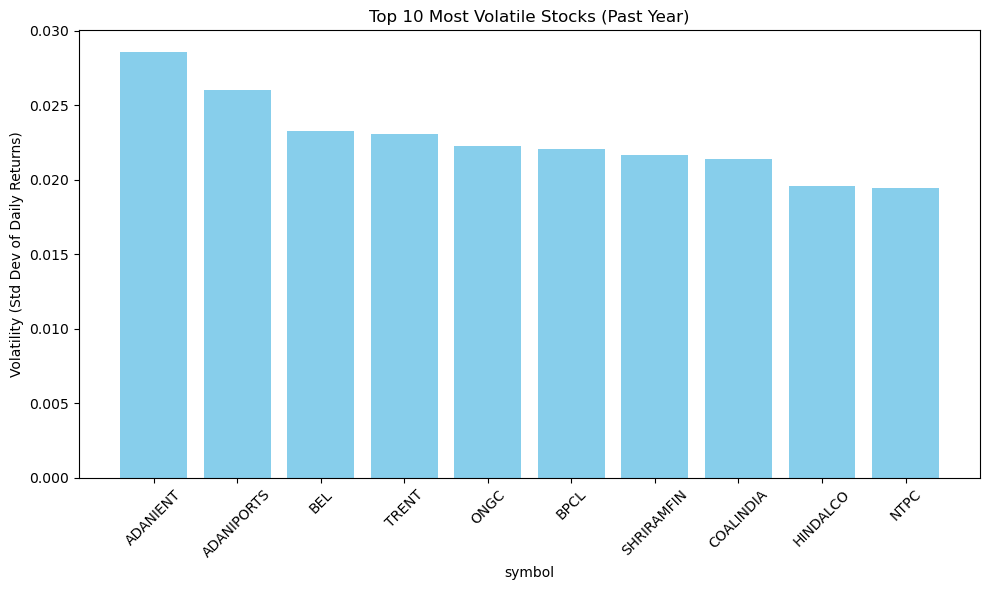

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top10_vol["symbol"], top10_vol["Volatility"], color="skyblue")
plt.xlabel("symbol")
plt.ylabel("Volatility (Std Dev of Daily Returns)")
plt.title("Top 10 Most Volatile Stocks (Past Year)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [6]:
top10_vol.to_csv("top10_volatility.csv", index=False)
vol_df.to_csv("all_stocks_volatility.csv", index=False)


2.SECTOR WISE PERFORMANCE ANALYSIS

In [7]:
import pandas as pd
import numpy as np
from datetime import datetime

# Read the CSV file
df = pd.read_csv('combined_stocks1.csv')

# Display basic info about the data
print("Data shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nUnique stocks:", df['symbol'].unique())
print("\nDate range sample:", df['date'].head())

# Parse the date column
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df['year'] = df['date'].dt.year

print("\nYears available:", sorted(df['year'].unique()))
print("\nData summary:")
print(df.groupby('symbol')['year'].agg(['min', 'max', 'count']))

Data shape: (14200, 9)

Column names: ['symbol', 'close', 'date', 'high', 'low', 'month', 'open', 'volume', 'source_file']

Unique stocks: ['ADANIENT' 'ADANIPORTS' 'APOLLOHOSP' 'ASIANPAINT' 'AXISBANK' 'BAJAJ-AUTO'
 'BAJAJFINSV' 'BAJFINANCE' 'BEL' 'BHARTIARTL' 'BPCL' 'BRITANNIA' 'CIPLA'
 'COALINDIA' 'DRREDDY' 'EICHERMOT' 'GRASIM' 'HCLTECH' 'HDFCBANK'
 'HDFCLIFE' 'HEROMOTOCO' 'HINDALCO' 'HINDUNILVR' 'ICICIBANK' 'INDUSINDBK'
 'INFY' 'ITC' 'JSWSTEEL' 'KOTAKBANK' 'LT' 'M&M' 'MARUTI' 'NESTLEIND'
 'NTPC' 'ONGC' 'POWERGRID' 'RELIANCE' 'SBILIFE' 'SBIN' 'SHRIRAMFIN'
 'SUNPHARMA' 'TATACONSUM' 'TATAMOTORS' 'TATASTEEL' 'TCS' 'TECHM' 'TITAN'
 'TRENT' 'ULTRACEMCO' 'WIPRO']

Date range sample: 0    03-10-2023 05:30
1    04-10-2023 05:30
2    05-10-2023 05:30
3    06-10-2023 05:30
4    09-10-2023 05:30
Name: date, dtype: object

Years available: [np.int32(2023), np.int32(2024)]

Data summary:
             min   max  count
symbol                       
ADANIENT    2023  2024    284
ADANIPORTS  2023  202

In [8]:



# Calculate yearly returns for each stock
yearly_returns = []

for stock in df['symbol'].unique():
    stock_data = df[df['symbol'] == stock].sort_values('date')
    
    for year in sorted(stock_data['year'].unique()):
        year_data = stock_data[stock_data['year'] == year].sort_values('date')
        
        if len(year_data) > 0:
            opening_price = year_data.iloc[0]['open']
            closing_price = year_data.iloc[-1]['close']
            
            # Calculate return percentage
            yearly_return = ((closing_price - opening_price) / opening_price) * 100
            
            yearly_returns.append({
                'Stock': stock,
                'Year': year,
                'Opening Price': round(opening_price, 2),
                'Closing Price': round(closing_price, 2),
                'Yearly Return (%)': round(yearly_return, 2)
            })

# Create DataFrame
returns_df = pd.DataFrame(yearly_returns)

# Calculate average yearly returns for each stock
avg_returns = returns_df.groupby('Stock')['Yearly Return (%)'].mean().reset_index()
avg_returns.columns = ['Stock', 'Average Yearly Return (%)']
avg_returns['Average Yearly Return (%)'] = avg_returns['Average Yearly Return (%)'].round(2)
avg_returns = avg_returns.sort_values('Average Yearly Return (%)', ascending=False)

print("Yearly Returns by Stock and Year:")
print(returns_df.to_string(index=False))
print("\n" + "="*60)
print("\nAverage Yearly Returns (across all years):")
print(avg_returns.to_string(index=False))

Yearly Returns by Stock and Year:
     Stock  Year  Opening Price  Closing Price  Yearly Return (%)
  ADANIENT  2023        2418.00        2848.95              17.82
  ADANIENT  2024        2852.30        2228.00             -21.89
ADANIPORTS  2023         826.00        1024.35              24.01
ADANIPORTS  2024        1026.55        1136.75              10.73
APOLLOHOSP  2023        5138.95        5704.10              11.00
APOLLOHOSP  2024        5741.00        6935.10              20.80
ASIANPAINT  2023        3166.10        3402.40               7.46
ASIANPAINT  2024        3403.00        2472.20             -27.35
  AXISBANK  2023        1035.00        1102.30               6.50
  AXISBANK  2024        1095.00        1142.40               4.33
BAJAJ-AUTO  2023        5065.00        6797.25              34.20
BAJAJ-AUTO  2024        6770.00        9481.65              40.05
BAJAJFINSV  2023        1530.25        1685.80              10.17
BAJAJFINSV  2024        1685.80        160

In [9]:
# Prepare data for Excel export
# Create summary statistics
summary_stats = {
    'Total Stocks': len(avg_returns),
    'Best Performer': avg_returns.iloc[0]['Stock'] + ' (' + str(avg_returns.iloc[0]['Average Yearly Return (%)']) + '%)',
    'Worst Performer': avg_returns.iloc[-1]['Stock'] + ' (' + str(avg_returns.iloc[-1]['Average Yearly Return (%)']) + '%)',
    'Average Return (All Stocks)': round(avg_returns['Average Yearly Return (%)'].mean(), 2),
    'Median Return': round(avg_returns['Average Yearly Return (%)'].median(), 2),
    'Positive Return Stocks': len(avg_returns[avg_returns['Average Yearly Return (%)'] > 0]),
    'Negative Return Stocks': len(avg_returns[avg_returns['Average Yearly Return (%)'] < 0])
}

print("\n" + "="*60)
print("SUMMARY STATISTICS")
print("="*60)
for key, value in summary_stats.items():
    print(f"{key}: {value}")

# Save to CSV files for Excel import
returns_df.to_csv('yearly_returns_by_year.csv', index=False)
avg_returns.to_csv('average_yearly_returns.csv', index=False)

# Create a summary statistics dataframe
summary_df = pd.DataFrame(list(summary_stats.items()), columns=['Metric', 'Value'])
summary_df.to_csv('summary_statistics.csv', index=False)

print("\nFiles created:")
print("1. yearly_returns_by_year.csv - Yearly returns breakdown")
print("2. average_yearly_returns.csv - Average returns by stock")
print("3. summary_statistics.csv - Summary statistics")


SUMMARY STATISTICS
Total Stocks: 50
Best Performer: TRENT (82.28%)
Worst Performer: INDUSINDBK (-12.96%)
Average Return (All Stocks): 14.43
Median Return: 12.98
Positive Return Stocks: 45
Negative Return Stocks: 5

Files created:
1. yearly_returns_by_year.csv - Yearly returns breakdown
2. average_yearly_returns.csv - Average returns by stock
3. summary_statistics.csv - Summary statistics


In [11]:

import pandas as pd

avg = pd.read_csv('average_yearly_returns.csv')
sec = pd.read_csv('sector.csv')

sec['symbol_clean'] = sec['symbol'].str.split(': ').str[-1]
print(sec.columns)

merged = avg.merge(sec[['company','sector','symbol_clean']], left_on='symbol', right_on='symbol_clean', how='left')
merged = merged.drop(columns=['symbol_clean'])

merged.to_csv('average_returns_with_sector.csv', index=False)

print(merged.head())
print(merged.shape)

Index(['company', 'sector', 'symbol', 'symbol_clean'], dtype='object')
       symbol  Average Yearly Return (%)             company       sector
0       TRENT                      82.28               TRENT    RETAILING
1         BEL                      42.78  BHARAT ELECTRONICS      DEFENCE
2         M&M                      41.25                 M&M  AUTOMOBILES
3  BAJAJ-AUTO                      37.12          BAJAJ AUTO  AUTOMOBILES
4  BHARTIARTL                      32.24                 NaN          NaN
(50, 4)


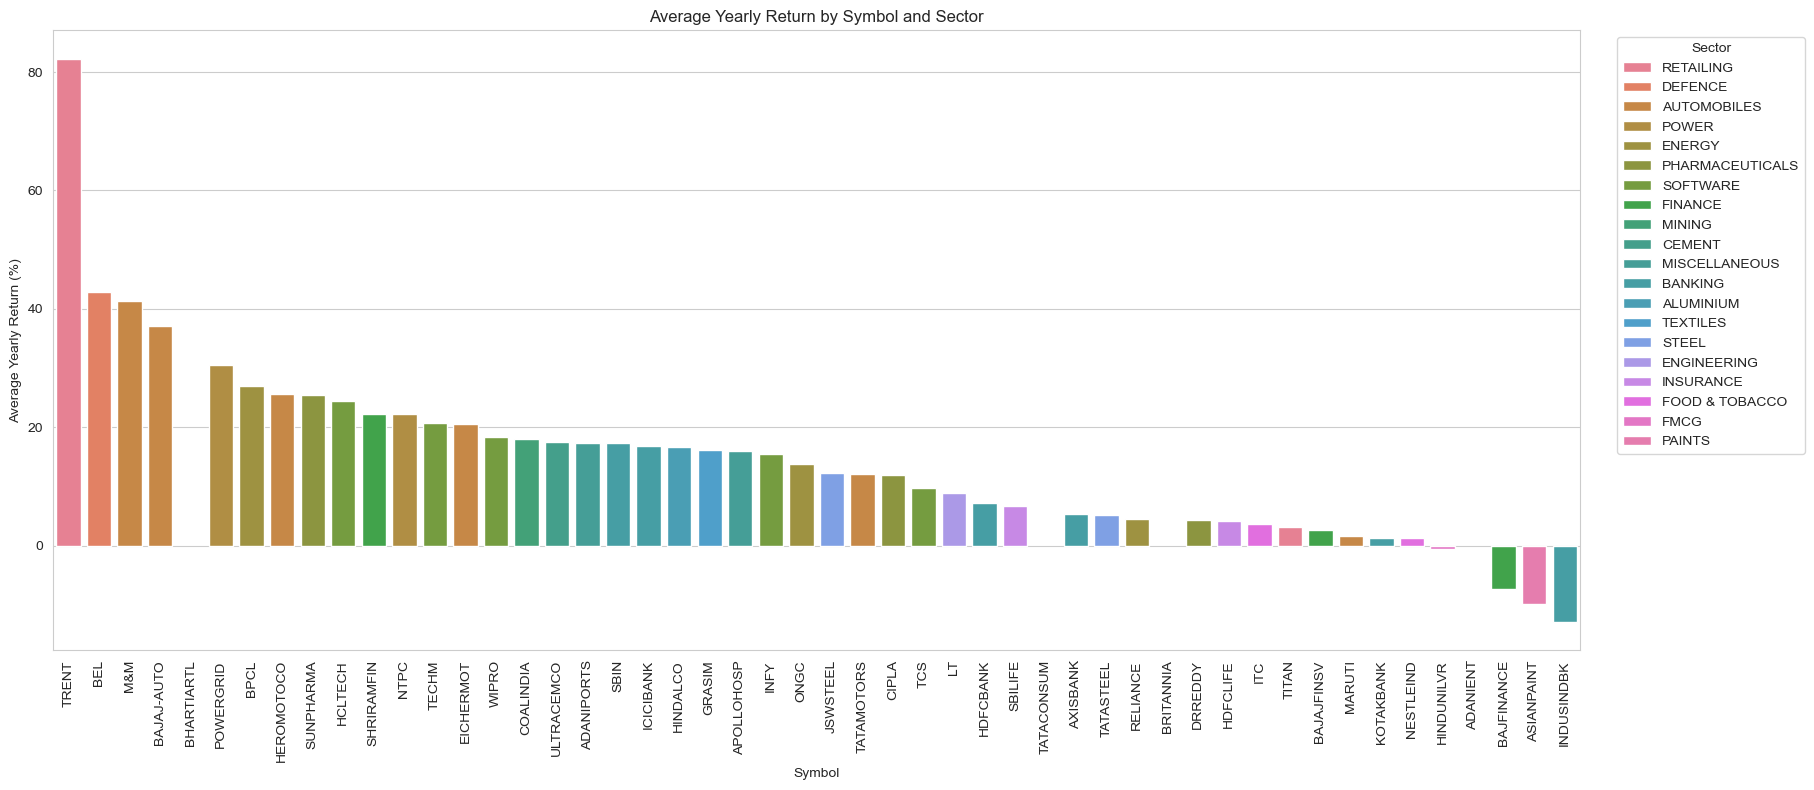

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the merged data
df = pd.read_csv("D:/stock analysis project final/venv/Scripts/2_sectorwise performance/average_returns_with_sector.csv")

# 2. Optional: sort by performance (descending)
df = df.sort_values("Average Yearly Return (%)", ascending=False)

# 3. Set up the plot
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")

# 4. Create bar plot: symbol vs average return, colored by sector
ax = sns.barplot(
    data=df,
    x="symbol",
    y="Average Yearly Return (%)",
    hue="sector",
    dodge=False  # single bar per symbol, color indicates sector
)

# 5. Format axes and labels
plt.xticks(rotation=90)
plt.xlabel("Symbol")
plt.ylabel("Average Yearly Return (%)")
plt.title("Average Yearly Return by Symbol and Sector")

# 6. Adjust layout and show / save
plt.tight_layout()
plt.legend(title="Sector", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.show()
# Or save:
# plt.savefig("avg_return_by_symbol_sector.png", dpi=300, bbox_inches="tight")


3.CUMULATIVE RETURN OVER TIME 

In [13]:
import pandas as pd

# Load data
df = pd.read_csv('combined_stocks1.csv')

# Parse date and sort
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
df = df.sort_values(['symbol', 'date'])

# Calculate daily simple return using close prices within each symbol
# r_t = (P_t / P_{t-1}) - 1

df['daily_return'] = df.groupby('symbol')['close'].pct_change()

# Replace first NaN daily_return per symbol with 0 (no prior day)
df['daily_return'] = df['daily_return'].fillna(0)

# Cumulative return as running product of (1 + daily_return) - 1
# C_t = prod_{i=1..t}(1 + r_i) - 1

df['cumulative_return'] = (
    (1 + df['daily_return']).groupby(df['symbol']).cumprod() - 1
) * 100  # in percentage

# Keep relevant columns
out = df[['symbol', 'date', 'close', 'daily_return', 'cumulative_return']]

# Save to CSV
out.to_csv('cumulative_returns_by_symbol.csv', index=False)

out.head(), out.shape

(     symbol                date    close  daily_return  cumulative_return
 0  ADANIENT 2023-10-03 05:30:00  2387.25      0.000000           0.000000
 1  ADANIENT 2023-10-04 05:30:00  2464.95      0.032548           3.254791
 2  ADANIENT 2023-10-05 05:30:00  2466.35      0.000568           3.313436
 3  ADANIENT 2023-10-06 05:30:00  2478.10      0.004764           3.805634
 4  ADANIENT 2023-10-09 05:30:00  2442.60     -0.014325           2.318567,
 (14200, 5))

In [14]:

import pandas as pd
df = pd.read_csv('cumulative_returns_by_symbol.csv')
df['date'] = pd.to_datetime(df['date'].str[:10], format='%Y-%m-%d')
df['year_month'] = df['date'].dt.to_period('M')
monthly_cum_ret = df.groupby(['symbol', 'year_month'])['cumulative_return'].last().reset_index()
top_symbols = monthly_cum_ret.groupby('symbol')['cumulative_return'].last().nlargest(5).index.tolist()
result = monthly_cum_ret[monthly_cum_ret['symbol'].isin(top_symbols)].pivot(index='year_month', columns='symbol', values='cumulative_return').round(2)
print(result.to_csv())
print("\nTop 5 symbols by latest cumulative return:", top_symbols)

year_month,BAJAJ-AUTO,BEL,BHARTIARTL,M&M,TRENT
2023-10,5.93,-4.27,-1.18,-5.13,4.64
2023-11,21.41,4.81,9.66,7.18,35.35
2023-12,35.5,32.33,11.55,12.49,48.36
2024-01,52.85,33.55,26.52,7.42,49.92
2024-02,57.67,47.34,21.4,25.69,88.52
2024-03,82.36,44.76,32.78,24.97,91.73
2024-04,77.49,67.92,42.91,40.26,114.17
2024-05,81.1,112.61,48.36,63.02,121.41
2024-06,89.41,119.76,56.06,86.46,166.13
2024-07,92.65,127.05,61.2,89.14,183.57
2024-08,117.12,115.01,71.73,82.48,247.66
2024-09,146.11,104.81,84.76,101.31,267.86
2024-10,96.08,104.67,74.28,77.48,246.19
2024-11,89.01,101.76,69.6,95.98,223.09


Top 5 symbols by latest cumulative return: ['TRENT', 'BEL', 'M&M', 'BAJAJ-AUTO', 'BHARTIARTL']


Top 5 symbols: ['TRENT', 'BEL', 'M&M', 'BAJAJ-AUTO', 'BHARTIARTL']


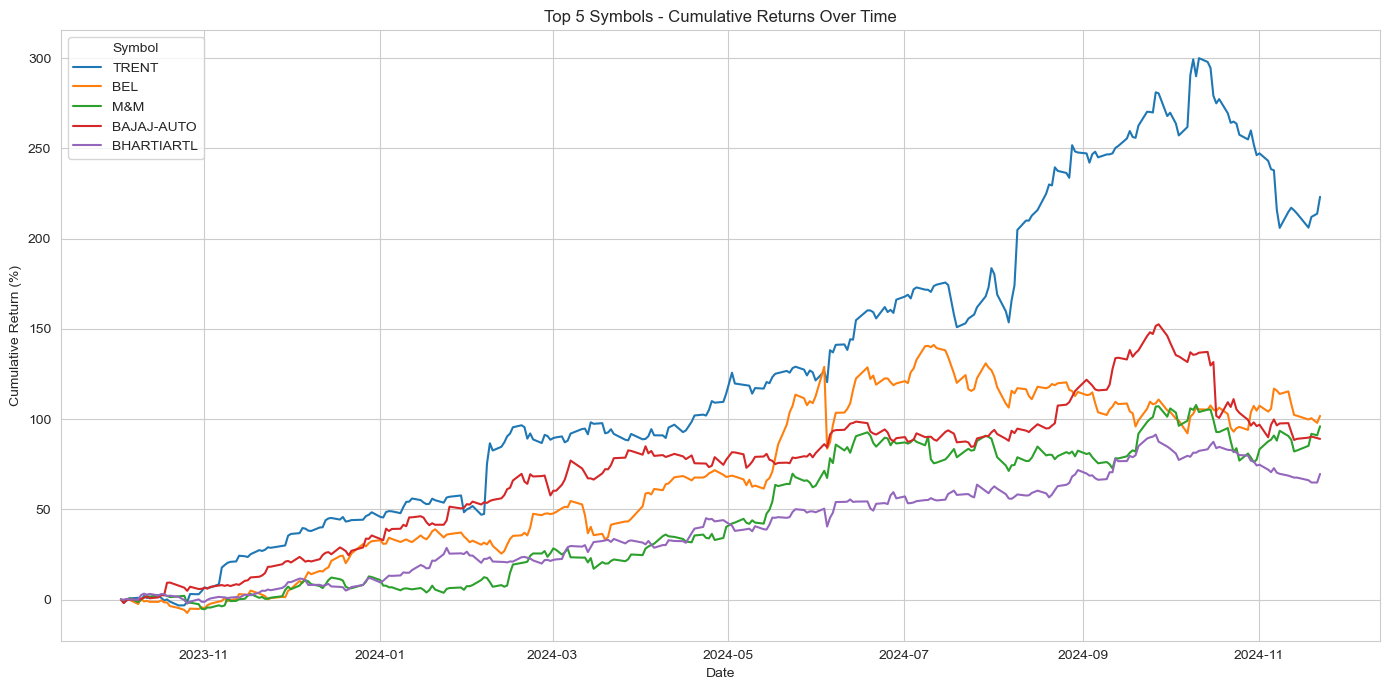

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load cumulative returns data
df = pd.read_csv("cumulative_returns_by_symbol.csv")

# 2. Prepare data
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(["symbol", "date"])

# 3. Find top 5 symbols by final cumulative return
last_vals = (
    df.groupby("symbol")
      .tail(1)[["symbol", "cumulative_return"]]
      .sort_values("cumulative_return", ascending=False)
)
top5_symbols = last_vals.head(5)["symbol"].tolist()
print("Top 5 symbols:", top5_symbols)

# 4. Filter for only top 5 symbols
top5_df = df[df["symbol"].isin(top5_symbols)]

# 5. Plot cumulative return time series
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

for sym in top5_symbols:
    sym_data = top5_df[top5_df["symbol"] == sym]
    plt.plot(
        sym_data["date"],
        sym_data["cumulative_return"],
        label=sym
    )

plt.title("Top 5 Symbols - Cumulative Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (%)")
plt.legend(title="Symbol")
plt.tight_layout()

plt.show()
# Optional: save the figure
# plt.savefig("top5_cumulative_returns.png", dpi=300, bbox_inches="tight")


4.STOCK-PRICE-CORRELATION

In [16]:
import pandas as pd

# Load data
df = pd.read_csv('combined_stocks1.csv')

# Pivot to get symbols as columns of closing prices, indexed by date
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')

price_pivot = df.pivot_table(index='date', columns='symbol', values='close')

# Option 1: correlation of raw closing prices
corr_prices = price_pivot.corr()

# Option 2: correlation of daily percentage returns (more standard in finance)
returns = price_pivot.pct_change()
corr_returns = returns.corr()

# Save both to CSV
corr_prices.to_csv('correlation_close_prices.csv')
corr_returns.to_csv('correlation_daily_returns.csv')

corr_prices.shape, corr_returns.shape

((50, 50), (50, 50))

In [17]:
import pandas as pd

# 1. Load the combined stock data
df = pd.read_csv("combined_stocks1.csv")

# 2. Prepare data: parse date and pivot to wide format
df["date"] = pd.to_datetime(df["date"], format="%d-%m-%Y %H:%M")

# rows = dates, columns = symbols, values = close prices
price_pivot = df.pivot_table(
    index="date",
    columns="symbol",
    values="close"
)

# 3. Compute daily percentage returns for each symbol
returns = price_pivot.pct_change()

# 4. Compute correlation matrix of daily returns
corr_matrix = returns.corr()

# 5. Save correlation matrix to CSV
corr_matrix.to_csv("stock_correlation_matrix.csv")


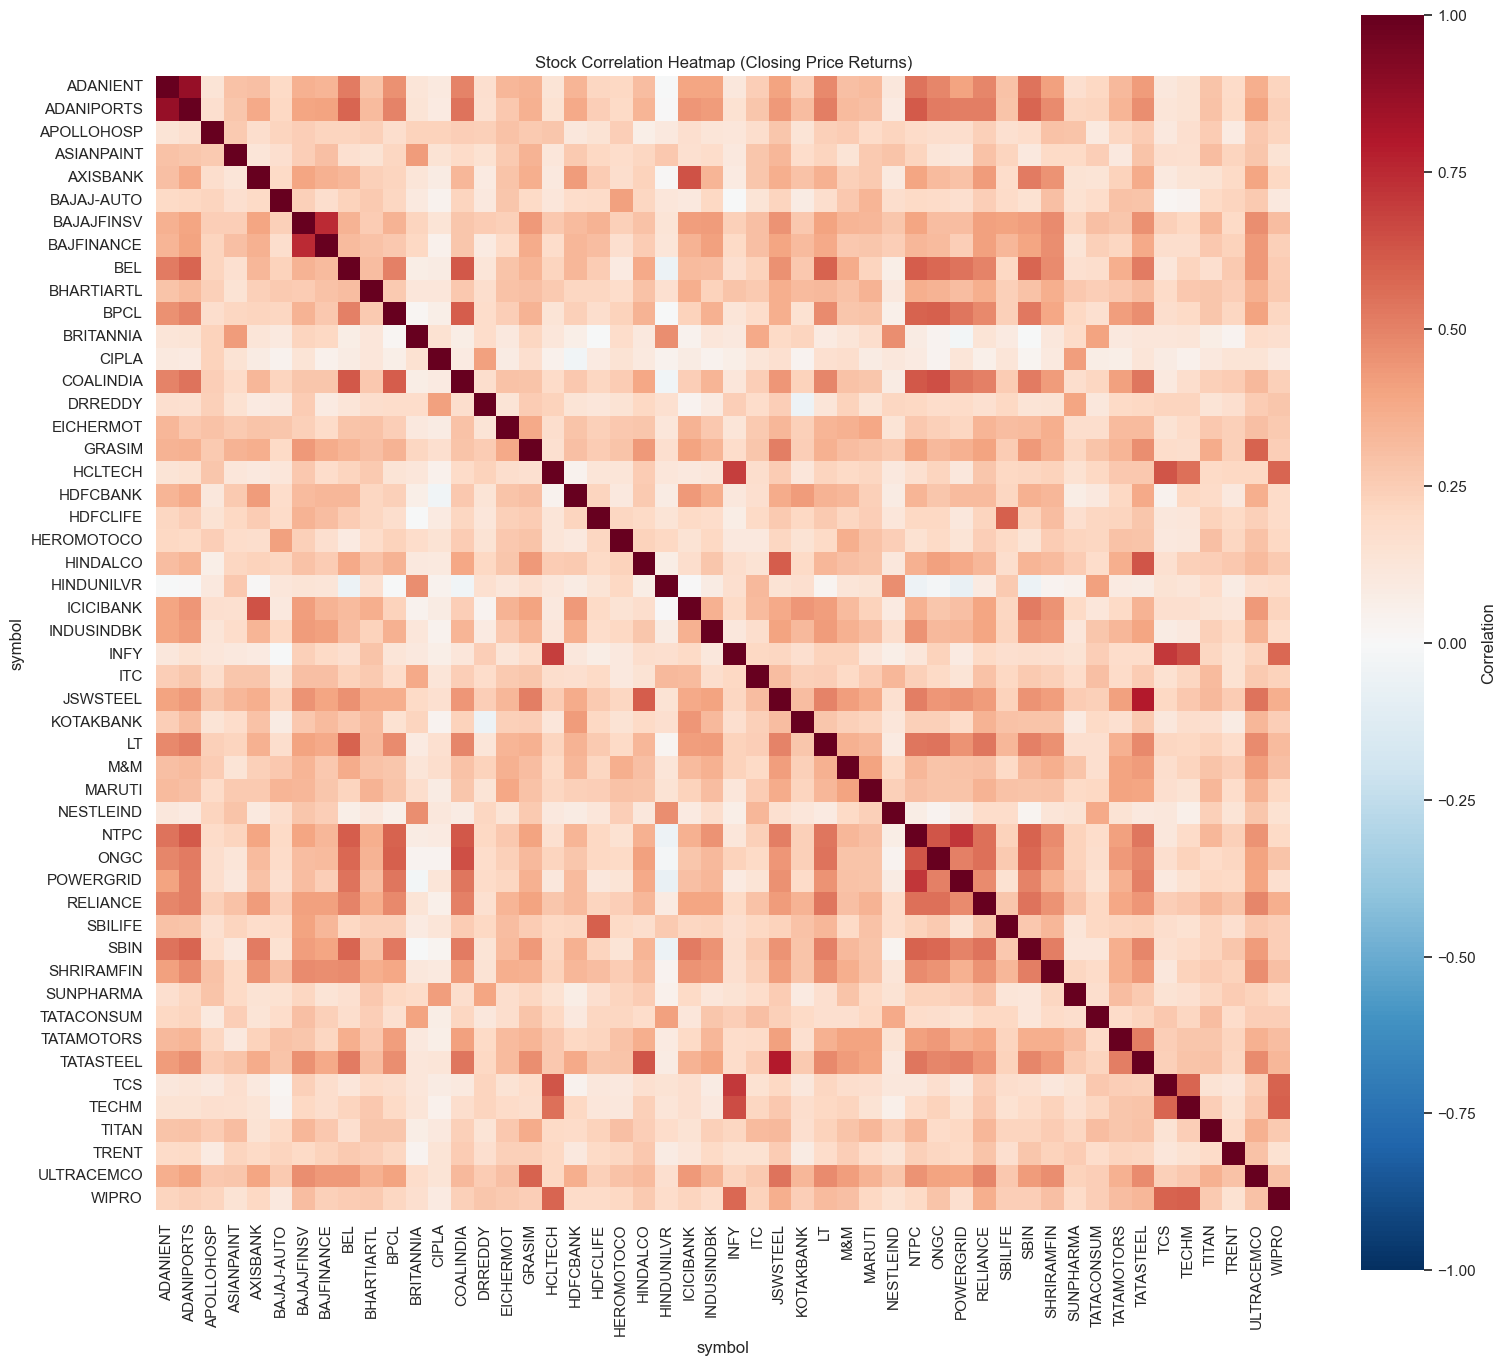

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the original combined stock data
df = pd.read_csv("combined_stocks1.csv")

# 2. Prepare data: parse dates and pivot close prices
df["date"] = pd.to_datetime(df["date"], format="%d-%m-%Y %H:%M")

# rows = dates, columns = symbols, values = close prices
price_pivot = df.pivot_table(
    index="date",
    columns="symbol",
    values="close"
)

# 3. Compute daily percentage returns
returns = price_pivot.pct_change()

# 4. Compute correlation matrix of daily returns
corr_matrix = returns.corr()

# 5. Save correlation matrix to CSV
corr_matrix.to_csv("stock_correlation_matrix.csv")

# 6. Plot heatmap
plt.figure(figsize=(16, 14))
sns.set(style="white")

ax = sns.heatmap(
    corr_matrix,
    cmap="RdBu_r",       # dark blue -> white -> dark red
    vmin=-1, vmax=1,     # full correlation range
    center=0,
    square=True,
    cbar_kws={"label": "Correlation"}
)

plt.title("Stock Correlation Heatmap (Closing Price Returns)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()
# Optional: save the figure
# plt.savefig("stock_correlation_heatmap.png", dpi=300, bbox_inches="tight")


5.Top-5-gainer-and-losers

In [19]:
import pandas as pd

# Load data
df = pd.read_csv("combined_stocks1.csv")

# Parse date and extract year-month
df["date"] = pd.to_datetime(df["date"], format="%d-%m-%Y %H:%M")
df["year_month"] = df["date"].dt.to_period("M")

# Sort for consistency
df = df.sort_values(["symbol", "date"])

# First open and last close per symbol & month
monthly = df.groupby(["symbol", "year_month"]).agg(
    open_first=("open", "first"),
    close_last=("close", "last")
).reset_index()

# Monthly return (%)
monthly["monthly_return_pct"] = (
    (monthly["close_last"] / monthly["open_first"]) - 1
) * 100

# Period to string
monthly["year_month"] = monthly["year_month"].astype(str)

# Reorder and save
monthly = monthly[["symbol", "year_month", "open_first", "close_last", "monthly_return_pct"]]
monthly.to_csv("monthly_returns_by_symbol.csv", index=False)


In [20]:
import pandas as pd

# 1. Load monthly returns
monthly = pd.read_csv("monthly_returns_by_symbol.csv")

# Ensure month is string (e.g., '2023-10')
monthly["year_month"] = monthly["year_month"].astype(str)

records = []

# 2. For each month, find top 5 gainers and losers
for ym, group in monthly.groupby("year_month"):
    # Drop rows without return
    g = group.dropna(subset=["monthly_return_pct"])

    # Top 5 gainers (highest returns)
    top_gainers = g.sort_values("monthly_return_pct", ascending=False).head(5)
    for _, row in top_gainers.iterrows():
        records.append({
            "year_month": ym,
            "symbol": row["symbol"],
            "monthly_return_pct": row["monthly_return_pct"],
            "type": "gainer"
        })

    # Top 5 losers (most negative returns)
    top_losers = g.sort_values("monthly_return_pct", ascending=True).head(5)
    for _, row in top_losers.iterrows():
        records.append({
            "year_month": ym,
            "symbol": row["symbol"],
            "monthly_return_pct": row["monthly_return_pct"],
            "type": "loser"
        })

# 3. Build result DataFrame
result = pd.DataFrame(records)

# Optional: sort for readability
result = result.sort_values(
    ["year_month", "type", "monthly_return_pct"],
    ascending=[True, True, False]   # gainers high → low, losers low → high within type
)

# 4. Save to CSV
result.to_csv("monthly_top5_gainers_losers.csv", index=False)


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Load data
df = pd.read_csv("monthly_top5_gainers_losers.csv")

# Ensure types
df["year_month"] = df["year_month"].astype(str)

# 2. Create output folder
out_dir = "monthly_top5_charts"
os.makedirs(out_dir, exist_ok=True)

sns.set_style("whitegrid")

# 3. Loop over each month and create a separate image
for ym, g in df.groupby("year_month"):
    # Sort so bars are nicely ordered within type
    g_sorted = g.sort_values(
        ["type", "monthly_return_pct"],
        ascending=[False, False]  # gainers high→low, losers low→high but kept under 'loser'
    )

    plt.figure(figsize=(8, 5))

    # Color by type
    colors = g_sorted["type"].map({"gainer": "green", "loser": "red"})

    plt.bar(
        g_sorted["symbol"],
        g_sorted["monthly_return_pct"],
        color=colors
    )

    plt.xticks(rotation=45, ha="right")
    plt.xlabel("Symbol")
    plt.ylabel("Monthly Return (%)")
    plt.title(f"Top 5 Gainers and Losers - {ym}")

    # Custom legend
    from matplotlib.patches import Patch
    legend_handles = [
        Patch(color="green", label="Gainer"),
        Patch(color="red", label="Loser"),
    ]
    plt.legend(handles=legend_handles, loc="best")

    plt.tight_layout()

    # Save one image per month
    fname = f"{out_dir}/top5_gainers_losers_{ym}.png"
    plt.savefig(fname, dpi=300, bbox_inches="tight")
    plt.close()

print("Charts saved in folder:", out_dir)


Charts saved in folder: monthly_top5_charts
